# Similar Regions examples



## Preliminaries

Please check the [README](README.md) file for important background info. For a command line program equivalent to this notebook, see [find_similar_regions.py](find_similar_regions.py).

Running these examples can be time consuming if the data has not already been locally cached.  If `compare_to=0` ([whole world](https://app.gro-intelligence.com/dictionary/regions/0)), and `requested_level=5` (district), we need several daily data series for 20 years for each of about 45,000 regions, i.e. close to 1 billion data points.
Subsequent calls with the same `compare_to` take advantage of the cache and do not trigger data downloads from the Gro API. The same applies to the seed region, i.e. the `region_id` argument, if the region is not present in the cache, data will be downloaded from the Gro API. 

## Initialization

We start with the `SimilarRegion` class definition and input data specification. `metric_properties` specifies the Gro  entities (such as metric_id, item_id, frequency_id) which will used to get data from the Gro API..  The default  used here contains 10 data series related to climate and soils (see [README](README.md) for details). 

No data will be downloaded yet - it will start on the first call to `similar_to`.

In [6]:
import logging
import nest_asyncio

from api.client.samples.similar_regions.similar_region import SimilarRegion
from api.client.samples.similar_regions.metric import metric_properties, metric_weights

# Allow nested IO loops (required for jupyter notebooks to work with async Gro API client, not needed in stand-alone python programs)
nest_asyncio.apply()

sim = SimilarRegion(metric_properties,
                    data_dir='/tmp/similar_regions_cache',
                    metric_weights=metric_weights)

# Uncomment this to see extensive informational messages during object build/region search
# sim._logger.setLevel(logging.DEBUG)

# Examples

Note that in each example, the size of the search area (`compare_to`) and the requested region level (district, province or country) significantly affect the amount of data that will be needed.  There are about 45,000 districts and about 5,000 provinces in the whole world.  This will use any previously downloaded data if any exists in data_dir. 

The search area and granularity can be at any level (district, province, country, continent or the whole world), as can the seed region as well, and they do not have to be at the same level. You can search for provinces similar to a given seed district, or districts similar to a country etc. 

## Example 1: Compare one district to districts in another continent

Find 10 districts (region level 5), in [Oceania (region 13)](https://app.gro-intelligence.com/dictionary/regions/13)  most similar to [Napa county, California, USA (region_id 136969)](https://app.gro-intelligence.com/dictionary/regions/136969).

In [8]:
%%time

print("Districts similar to Napa in Oceania:")
for i in sim.similar_to(136969, number_of_regions=10, requested_level=5, compare_to=13):
    print(i)

Districts similar to Napa in Oceania:
{'rank': 0, 'id': 102852, 'name': 'Upper Hunter Shire', 'dist': 1.0172970855301788, 'parent': {'id': 10174, 'name': 'New South Wales'}, 'grand_parent': {'id': 1013, 'name': 'Australia'}}
{'rank': 1, 'id': 102739, 'name': 'Dungog', 'dist': 1.0799373298855242, 'parent': {'id': 10174, 'name': 'New South Wales'}, 'grand_parent': {'id': 1013, 'name': 'Australia'}}
{'rank': 2, 'id': 100022537, 'name': 'Indigo', 'dist': 1.0809634582364187, 'parent': {'id': 10180, 'name': 'Victoria'}, 'grand_parent': {'id': 1013, 'name': 'Australia'}}
{'rank': 3, 'id': 100022487, 'name': 'Mid-Western Regional', 'dist': 1.111684988763541, 'parent': {'id': 10174, 'name': 'New South Wales'}, 'grand_parent': {'id': 1013, 'name': 'Australia'}}
{'rank': 4, 'id': 100022557, 'name': 'Murrindindi', 'dist': 1.1134563951018985, 'parent': {'id': 10180, 'name': 'Victoria'}, 'grand_parent': {'id': 1013, 'name': 'Australia'}}
{'rank': 5, 'id': 103807, 'name': 'Wodonga', 'dist': 1.1182429

## Example 2: Compare one district to districts in another country

Same as Example 1, but searching for districts in [Ethiopia (region_id 1065)](https://app.gro-intelligence.com/dictionary/regions/1065) similar to Napa. This will trigger rebuilding of SimilarRegion object, since we are using a new `compare_to` region.

In [10]:
%%time
# Use compare_to argument to restrict search to districts within particular country

print("Districts similar to Napa in Ethiopia:")
for i in sim.similar_to(136969, number_of_regions=10, requested_level=5, compare_to=1065):
    print(i)

Districts similar to Napa in Ethiopia:
{'rank': 0, 'id': 142811, 'name': 'Guji', 'dist': 1.2340454927482767, 'parent': {'id': 10925, 'name': 'Oromia'}, 'grand_parent': {'id': 1065, 'name': 'Ethiopia'}}
{'rank': 1, 'id': 115015, 'name': 'Eastern', 'dist': 1.397348519836437, 'parent': {'id': 10928, 'name': 'Tigray'}, 'grand_parent': {'id': 1065, 'name': 'Ethiopia'}}
{'rank': 2, 'id': 114979, 'name': 'Borena', 'dist': 1.494617589255949, 'parent': {'id': 10925, 'name': 'Oromia'}, 'grand_parent': {'id': 1065, 'name': 'Ethiopia'}}
{'rank': 3, 'id': 114978, 'name': 'Bale', 'dist': 1.5501842888658484, 'parent': {'id': 10925, 'name': 'Oromia'}, 'grand_parent': {'id': 1065, 'name': 'Ethiopia'}}
{'rank': 4, 'id': 114991, 'name': 'Liben', 'dist': 1.560802559811437, 'parent': {'id': 10926, 'name': 'Somali'}, 'grand_parent': {'id': 1065, 'name': 'Ethiopia'}}
{'rank': 5, 'id': 142822, 'name': 'Alaba', 'dist': 1.562030449923342, 'parent': {'id': 10927, 'name': 'Southern Nations, Nationalities and Peop

## Example 3: Compare one province to provinces in another continent

Find 20 provinces (region level 4) in [Europe (region_id 14)](https://app.gro-intelligence.com/dictionary/regions/14) most similar to the US state of [Iowa (region_id 13066)](https://app.gro-intelligence.com/dictionary/regions/13066), and provide detailed distance report. 

Note that the results are mostly provinces in the [Black Sea area, which is what we would expect](https://gro-intelligence.com/insights/articles/black-sea-agricultural-trade-gaining-ground).

In [32]:
print("Provinces similar to Iowa in Europe:")
for i in sim.similar_to(13066, number_of_regions=20, requested_level=4, detailed_distance=True, compare_to=14):
    print(i)

Provinces similar to Iowa in Europe:
{'rank': 0, 'id': 12284, 'name': 'Cluj', 'dist': {'total': 0.7568754179736581, 'covar': 0.4332610469450082, 'cation_exchange_30cm': 0.25067659587868785, 'clay_30cm': 0.041566176229737684, 'land_surface_temperature': 0.11604313658278209, 'organic_carbon_content_fine_earth_30cm': 0.14872593597649922, 'ph_h2o_30cm': 0.01464601966557133, 'rainfall': 0.2128178623321425, 'sand_30cm': 0.30008835181434, 'silt_30cm': 0.3360045979194928, 'soil_moisture': 0.14035175050734083, 'soil_water_capacity_100cm': 0.12975621841492435}, 'parent': {'id': 1167, 'name': 'Romania'}, 'grand_parent': {'id': 0, 'name': 'World'}}
{'rank': 1, 'id': 11714, 'name': 'Edinet', 'dist': {'total': 0.7637790300782397, 'covar': 0.428535061794544, 'cation_exchange_30cm': 0.029827030581420555, 'clay_30cm': 0.05072413701545009, 'land_surface_temperature': 0.06843908553742839, 'organic_carbon_content_fine_earth_30cm': 0.10505897239232384, 'ph_h2o_30cm': 0.2234878843299568, 'rainfall': 0.39259

{'rank': 14, 'id': 12350, 'name': 'Krasnodar', 'dist': {'total': 0.8416746032883827, 'covar': 0.5674858935487971, 'cation_exchange_30cm': 0.06418767294753236, 'clay_30cm': 0.2119685063768344, 'land_surface_temperature': 0.1744446488024196, 'organic_carbon_content_fine_earth_30cm': 0.2916845651077, 'ph_h2o_30cm': 0.2049123556685135, 'rainfall': 0.13022566301201755, 'sand_30cm': 0.06117376336216507, 'silt_30cm': 0.2582988759550584, 'soil_moisture': 0.28255922902377684, 'soil_water_capacity_100cm': 0.11209959415305581}, 'parent': {'id': 1168, 'name': 'Russia'}, 'grand_parent': {'id': 0, 'name': 'World'}}
{'rank': 15, 'id': 11725, 'name': 'Rezina', 'dist': {'total': 0.8421945236181012, 'covar': 0.48206093273544093, 'cation_exchange_30cm': 0.09983661899832219, 'clay_30cm': 0.0885534524260907, 'land_surface_temperature': 0.1009616535744211, 'organic_carbon_content_fine_earth_30cm': 0.08399743610536256, 'ph_h2o_30cm': 0.3135175250174327, 'rainfall': 0.358730071424045, 'sand_30cm': 0.094037120

## Example 4: Compare one district to districts worldwide and visualize on a choropleth map
Finally, we search for the 2000 districts in the world most similar to [Crawford county, Iowa](https://app.gro-intelligence.com/dictionary/regions/137568), which has some of the highest corn yields in the US. 

In [23]:
regions = list(sim.similar_to(137568, number_of_regions=2000, compare_to=0, requested_level=5))

Now let's get additional data for presentation, namely [region geometry from the Gro API](https://developers.gro-intelligence.com/v1.40.6/api.html#api.client.gro_client.GroClient.get_geojson) to display the results on a map. Note that the region geometry involves loading detailed polygons which can take a while.

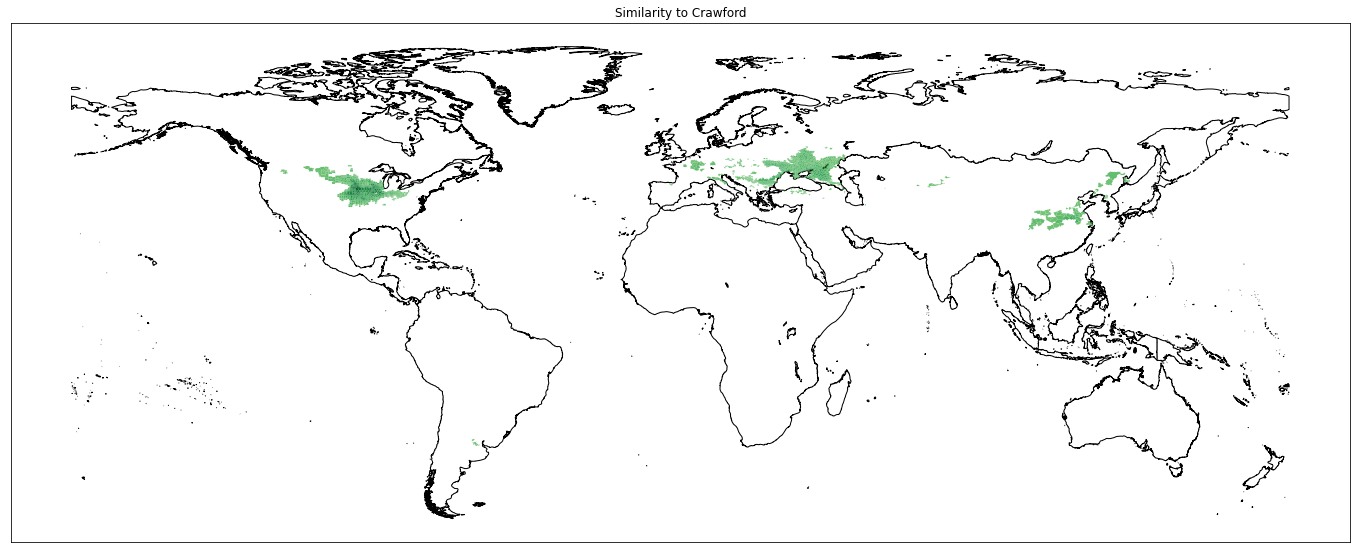

In [25]:
import os
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
from shapely.geometry import shape
from groclient.client import GroClient

client = GroClient('api.gro-intelligence.com', os.environ['GROAPI_TOKEN'])

max_dist = max([r['dist'] for r in regions])

gdf = geopandas.GeoDataFrame([
    { 
        'region_id':  r['id'],
        'geometry': shape(client.get_geojson(r['id'])['geometries'][0]),
        'similarity': 100*(max_dist - r['dist']/2)/max_dist
    } for r in regions])
gdf.set_index('region_id')

fig, axes = plt.subplots(1, 1, figsize=(24,16))
gdf.plot(column='similarity',  cmap='Greens', ax=axes, vmin=0, vmax=100, zorder=2)

# add continents for visual context
continents = geopandas.GeoDataFrame([
    {
        'region_id': cid,
        'geometry': shape(client.get_geojson(cid, zoom_level=1)['geometries'][0]),
        'similarity': 0
    } for cid in [11, 12, 13, 14, 15, 16]])
continents.set_index('region_id')
continents.plot(column='similarity',  cmap='Greys', ax=axes, vmin=0, vmax=100, edgecolor='black', zorder=1)

axes.set_title('Similarity to {}'.format(client.lookup('regions', 137568)['name']))
axes.xaxis.set_visible(False)
axes.yaxis.set_visible(False)
plt.show()

As one would expect, the most similar regions are in the US Corn Belt, but also in well known grain-growing areas in Western Europe, around the Black Sea, and in China.